In [1]:
import os
import sys

import sys
sys.path.append("..")

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from models.multiscale_vae import MultiscaleVariationalAutoencoder

import utils
import utils.transform

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

Using TensorFlow backend.


In [2]:
# run params
SECTION = "vae"
RUN_ID = "0001"
DATA_NAME = "cifar10"
BASE_DIR= "./run"
BASE_DIR_SECTION = "{0}/{1}/".format(BASE_DIR, SECTION)
RUN_FOLDER = BASE_DIR_SECTION + "_".join([RUN_ID, DATA_NAME])

if not os.path.exists(BASE_DIR):
    os.mkdir(BASE_DIR)
    
if not os.path.exists(BASE_DIR_SECTION):
    os.mkdir(BASE_DIR_SECTION)
    
if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, "viz"))
    os.mkdir(os.path.join(RUN_FOLDER, "images"))
    os.mkdir(os.path.join(RUN_FOLDER, "weights"))

mode = "build"

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

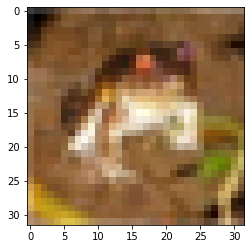

In [4]:
# Display original
plt.figure()
plt.imshow(x_train[0,:,:,:]) 
plt.show()  

In [5]:
multiscale_vae = MultiscaleVariationalAutoencoder(
    input_dims=(32,32,3), 
    levels=3, 
    z_dims=[16, 64, 256],
    encoder={
        "filters": [64, 64, 64, 64, 32],
        "kernel_size": [(5, 5), (3, 3), (3, 3,), (1, 1), (1, 1)],
        "strides": [(2, 2), (1, 1), (1, 1), (1, 1), (1, 1)]
            },
    decoder={
        "filters":[64, 64, 64, 64, 32],
        "kernel_size": [(5, 5), (3, 3), (3, 3,), (1, 1), (1, 1)],
        "strides": [(2, 2), (1, 1), (1, 1), (1, 1), (1, 1)]
    })

In [6]:
LEARNING_RATE = 0.001
R_LOSS_FACTOR = 1000
KL_LOSS_FACTOR = 10

In [7]:
multiscale_vae.compile(
    learning_rate=LEARNING_RATE, 
    r_loss_factor=R_LOSS_FACTOR,
    kl_loss_factor=KL_LOSS_FACTOR
)

In [8]:
EPOCHS = 50
BATCH_SIZE = 32
PRINT_EVERY_N_BATCHES = 1000
INITIAL_EPOCH = 0

In [9]:
# serialize model to JSON
model_json = multiscale_vae.model_predict.to_json()
with open("model_predict.json", "w") as json_file:
    json_file.write(model_json)

In [10]:
multiscale_vae.train(     
    x_train, 
    batch_size = BATCH_SIZE, 
    epochs = EPOCHS, 
    run_folder = RUN_FOLDER, 
    print_every_n_batches = PRINT_EVERY_N_BATCHES, 
    initial_epoch = INITIAL_EPOCH,
    step_size=10,
    lr_decay=0.5
)

Epoch 1/50
   96/50000 [..............................] - ETA: 2:53:16 - loss: 857.2769 - activation_1_loss: 303.9758 - activation_2_loss: 278.9434 - activation_3_loss: 274.3576 - activation_1_vae_r_loss: 303.9758 - activation_2_vae_r_loss: 278.9434 - activation_3_vae_r_loss: 274.3576

/home/arxwn/.conda/envs/monochain/lib/python3.7/site-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.792146). Check your callbacks.
  % delta_t_median)


50000/50000 [==============================] - 226s 5ms/step - loss: 514.2837 - activation_1_loss: 164.3114 - activation_2_loss: 172.2264 - activation_3_loss: 177.7459 - activation_1_vae_r_loss: 164.3114 - activation_2_vae_r_loss: 172.2264 - activation_3_vae_r_loss: 177.7459
Epoch 2/50
50000/50000 [==============================] - 206s 4ms/step - loss: 398.1026 - activation_1_loss: 142.5642 - activation_2_loss: 138.1621 - activation_3_loss: 117.3762 - activation_1_vae_r_loss: 142.5642 - activation_2_vae_r_loss: 138.1621 - activation_3_vae_r_loss: 117.3762
Epoch 3/50
50000/50000 [==============================] - 206s 4ms/step - loss: 357.2866 - activation_1_loss: 132.1143 - activation_2_loss: 129.3345 - activation_3_loss: 95.8377 - activation_1_vae_r_loss: 132.1143 - activation_2_vae_r_loss: 129.3345 - activation_3_vae_r_loss: 95.8377
Epoch 4/50
50000/50000 [==============================] - 206s 4ms/step - loss: 336.1429 - activation_1_loss: 125.4867 - activation_2_loss: 121.3998 - a

50000/50000 [==============================] - 206s 4ms/step - loss: 266.8334 - activation_1_loss: 99.8764 - activation_2_loss: 98.5787 - activation_3_loss: 68.3783 - activation_1_vae_r_loss: 99.8764 - activation_2_vae_r_loss: 98.5787 - activation_3_vae_r_loss: 68.3783
Epoch 30/50
50000/50000 [==============================] - 206s 4ms/step - loss: 266.5808 - activation_1_loss: 99.7774 - activation_2_loss: 98.4928 - activation_3_loss: 68.3106 - activation_1_vae_r_loss: 99.7774 - activation_2_vae_r_loss: 98.4928 - activation_3_vae_r_loss: 68.3106
Epoch 31/50
50000/50000 [==============================] - 206s 4ms/step - loss: 266.3534 - activation_1_loss: 99.7279 - activation_2_loss: 98.4149 - activation_3_loss: 68.2107 - activation_1_vae_r_loss: 99.7279 - activation_2_vae_r_loss: 98.4149 - activation_3_vae_r_loss: 68.2107
Epoch 32/50
50000/50000 [==============================] - 206s 4ms/step - loss: 266.1938 - activation_1_loss: 99.6709 - activation_2_loss: 98.3349 - activation_3_los

In [11]:
results = multiscale_vae.model_predict.predict(x_train[0:10,:,:,:])

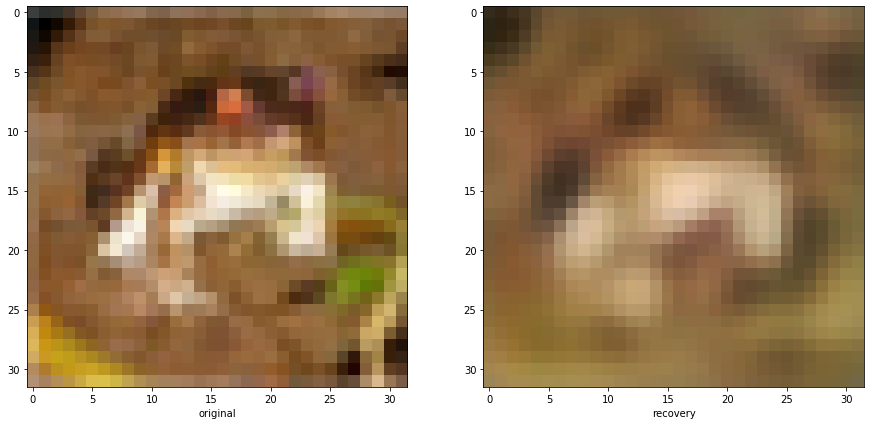

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
plt.subplot(1,2,1)
plt.xlabel("original")
plt.imshow(x_train[0,:,:,:])
plt.subplot(1,2,2)
plt.imshow(results[0,:,:,:])
plt.xlabel("recovery")
plt.show() 

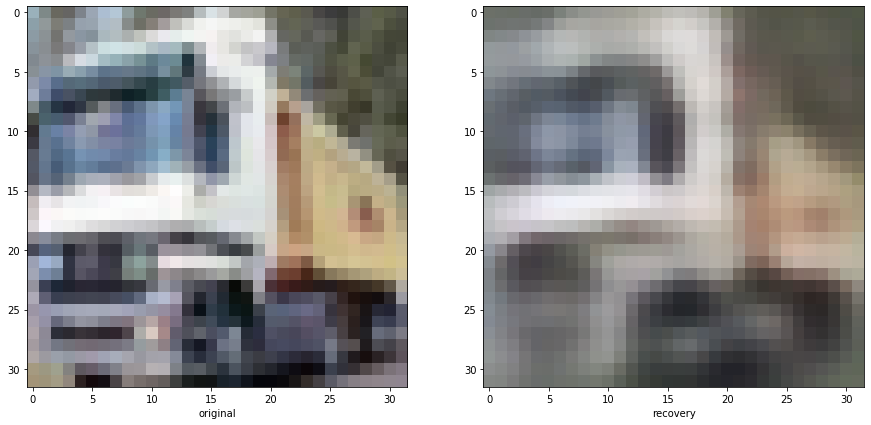

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
plt.subplot(1,2,1)
plt.xlabel("original")
plt.imshow(x_train[1,:,:,:])
plt.subplot(1,2,2)
plt.imshow(results[1,:,:,:])
plt.xlabel("recovery")
plt.show() 

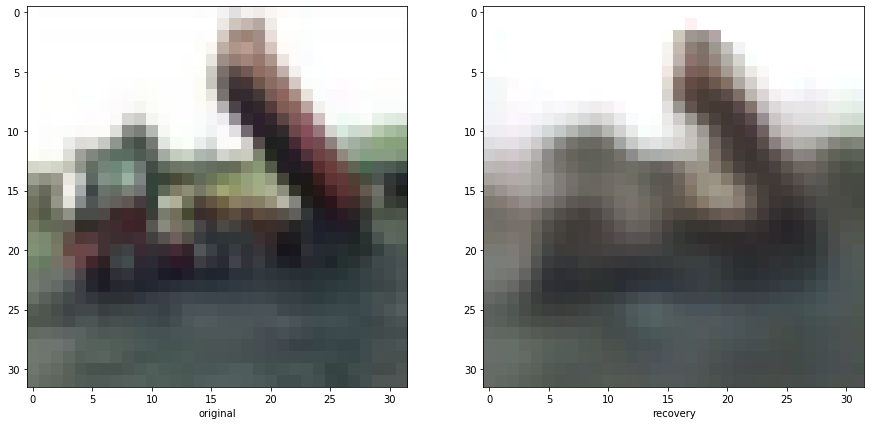

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15,15))
plt.subplot(1,2,1)
plt.xlabel("original")
plt.imshow(x_train[2,:,:,:])
plt.subplot(1,2,2)
plt.imshow(results[2,:,:,:])
plt.xlabel("recovery")
plt.show() 